# Corpus exploration

Idea of this notebook is to explore vocabulary of most toxic and most neutral sentences.

In [1]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
import wordcloud
from nltk import ngrams
from collections import Counter
from tqdm import tqdm
from src.data.text_preprocessing import get_words_only, get_bad_words

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/said/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Get a set of bad words from toxic_words.txt (**large collection of toxic and swear words**)

In [4]:
toxic_words = get_bad_words()
for i,w in enumerate(toxic_words):
    print(w)
    if i == 10:
        break 

coksucka
brotherfucker
teez
pussyh
assnigger
perjurs
blowhard
shitey
t1tt1e5
whitefragilitycankissmyass
murderer


Helper function to collect word frequencies and make bar plots

**Note that all helper functions tokenize the sentence before counting its words**

In [18]:
def make_ngram(words: list[str], n:int):
    res = list(ngrams(words, n))
    return res


In [34]:
def make_frequency_plot(word_freq, title="Word Frequency", n_most_common = 5, is_ngram = False):
    words, frequencies = zip(*word_freq.most_common(n_most_common))

    if is_ngram:
        words = [" ".join(word) for word in words]
    plt.figure(figsize=(15, 5))
    plt.bar(words, frequencies)
    plt.title(title)
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.show()

In [20]:
def corpus_freq(df: pd.DataFrame, toxic=False):
    freq = Counter([])
    for _, row in tqdm(df.iterrows(), total=len(df)):
        words = get_words_only(row["sentence"])
        if toxic:
            words = [word for word in words if word in toxic_words]
        freq.update(words)
    return freq

In [38]:
def ngram_freq(df: pd.DataFrame, n: int, toxic=False):
    freq = Counter([])
    for _, row in tqdm(df.iterrows(), total=len(df)):
        words = get_words_only(row["sentence"])
        if toxic:
            words = [word for word in words if word in toxic_words]
        ngrams = make_ngram(words, n)
        freq.update(ngrams)
    return freq

# Collect most toxic and most neutral sentences

In [22]:

toxic_dataset = pd.read_csv("./data/interim/toxic.tsv", sep="\t")
print(toxic_dataset.info())
toxic_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577777 entries, 0 to 577776
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   sentence        577777 non-null  object 
 1   toxicity_score  577777 non-null  float64
dtypes: float64(1), object(1)
memory usage: 8.8+ MB
None


,sentence,toxicity_score
0,"if Alkar floods her with her mental waste, it ...",0.981983
1,you're becoming disgusting.,0.999039
2,"well, we can spare your life.",0.985068
3,"monkey, you have to wake up.",0.994215
4,I have orders to kill her.,0.999348


In [23]:
neutral_dataset = pd.read_csv("./data/raw/neutral.tsv", sep="\t")
print(neutral_dataset.info())
neutral_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577777 entries, 0 to 577776
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   sentence        577777 non-null  object 
 1   toxicity_score  577777 non-null  float64
dtypes: float64(1), object(1)
memory usage: 8.8+ MB
None


,sentence,toxicity_score
0,"If Alkar is flooding her with psychic waste, t...",0.014195
1,Now you're getting nasty.,0.065473
2,"Well, we could spare your life, for one.",0.213313
3,"Ah! Monkey, you've got to snap out of it.",0.053362
4,I've got orders to put her down.,0.009402


In [24]:
top_toxic = toxic_dataset.nlargest(1000, columns="toxicity_score").reset_index()
print(len(top_toxic))
top_toxic.head(5)

1000


,index,sentence,toxicity_score
0,84835,"someone for sure, but not these idiots.",0.999730
1,455358,that's the last time we played poker with some...,0.999726
2,133403,because your idiot husband couldn't just wave ...,0.999724
3,551255,His father would have used a booming voice to ...,0.999724
4,265344,"that's why I sent those idiots to watch you. """,0.999724


In [25]:
top_neutral = neutral_dataset.nsmallest(1000, columns="toxicity_score").reset_index()
print(len(top_neutral))
top_neutral.head(5)

1000


,index,sentence,toxicity_score
0,291782,and what parting gift am I prepared to offer? ...,0.000033
1,317462,and what parting gift am I prepared to offer? ...,0.000033
2,489393,"' ""I went from place to place telling friends ...",0.000033
3,358271,"And the best thing is, even if they weren't wa...",0.000033
4,398469,I don't know why he doesn't want one director ...,0.000034


# Exploration of the most common words from sentence with highest toxicity

Simple frequency bar plot shows that the word *stupid* is extremely common for toxic sentences

And one can agree that this histogram may spot the words which are good indicators of the toxicity.

100%|██████████| 1000/1000 [00:00<00:00, 1429.21it/s]


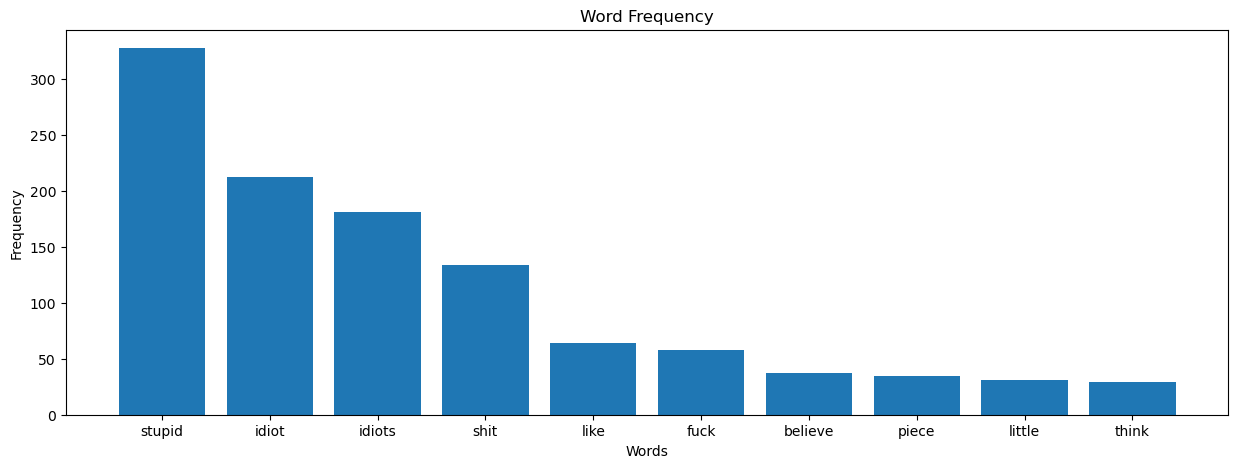

In [26]:
toxic_freq = corpus_freq(top_toxic)
make_frequency_plot(word_freq=toxic_freq, n_most_common=10)

This bar plot is constructed only from toxic words which appeared in toxic sentences.

Aganin the word *stupid* is a "leader". Also one can agree that this plot is better because it ignores some neutral words that may appear in combination with toxic words (*such as piece, little and so on*) 

100%|██████████| 1000/1000 [00:00<00:00, 1294.34it/s]


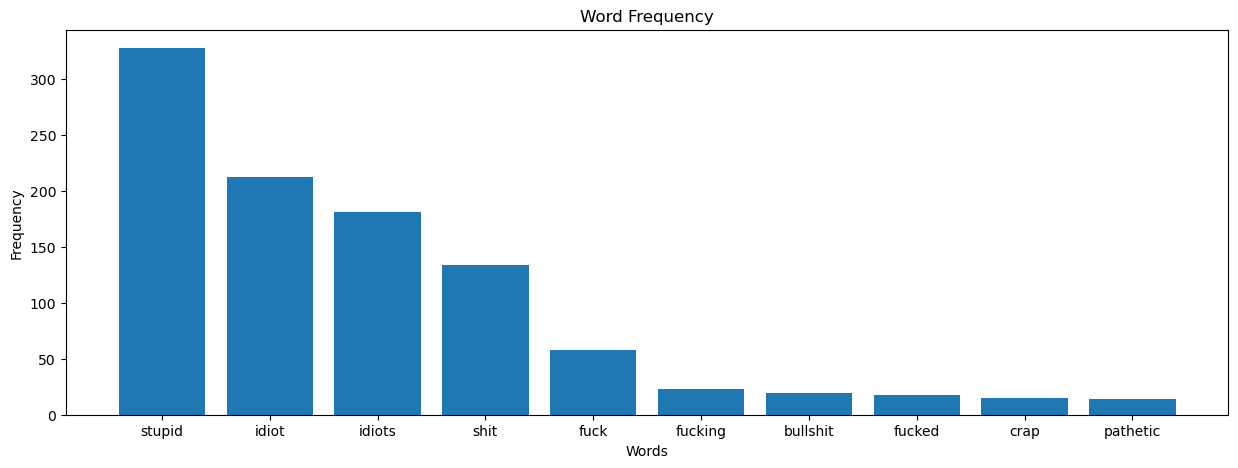

In [27]:
only_toxic_freq = corpus_freq(top_toxic, True)
make_frequency_plot(word_freq=only_toxic_freq, n_most_common=10)

Let us further elaborate the idea of toxic phrases (*combination of toxic and neutral words*). To do so we can construct bar plots for ngrams rather than single words

One can agree that bar plot below managed to capture toxic phrases successfully.

100%|██████████| 1000/1000 [00:00<00:00, 1165.69it/s]


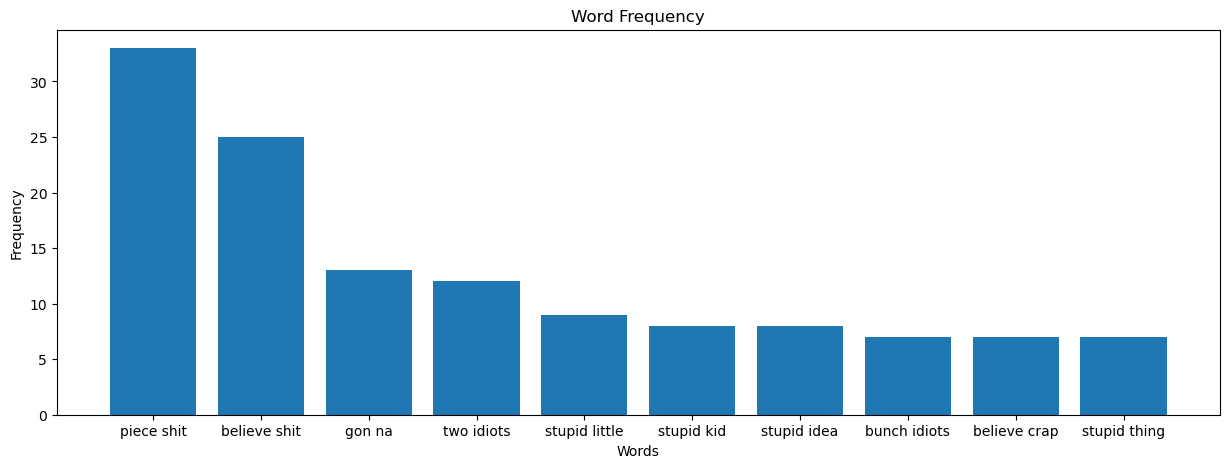

In [37]:
toxic_bigram_freq = ngram_freq(top_toxic,2)
make_frequency_plot(word_freq=toxic_bigram_freq, n_most_common=10, is_ngram=True)

Let us also try to construct bigram for only toxic words which appeared in each sentence.

This bar plot may extend the idea of *toxicity indicators* from single words to combination of words.

100%|██████████| 1000/1000 [00:00<00:00, 1176.77it/s]


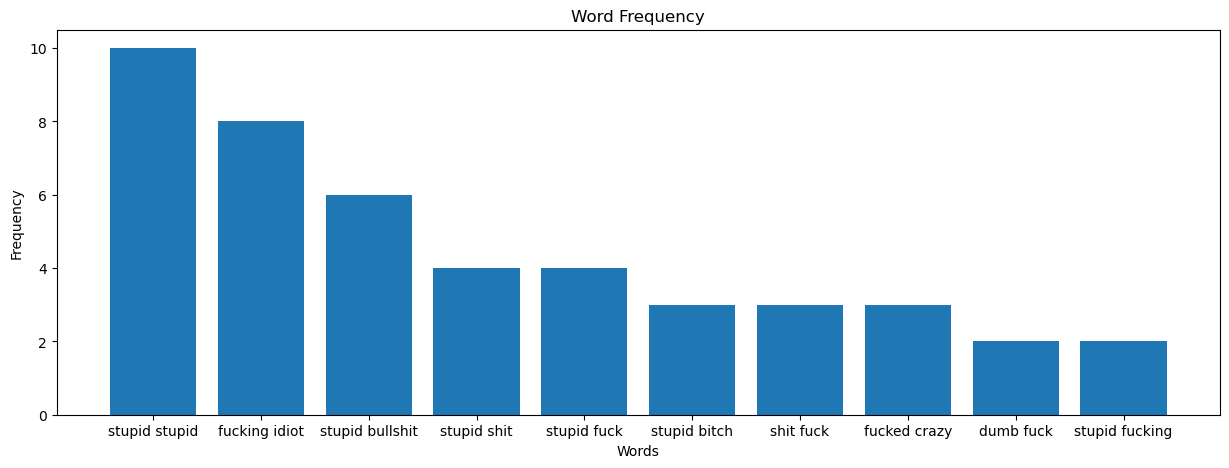

In [39]:
only_toxic_bigram_freq = ngram_freq(top_toxic, 2, True)
make_frequency_plot(word_freq=only_toxic_bigram_freq, n_most_common=10, is_ngram=True)

And finally let us make word cloud just to better visualize the same results from bar plots )

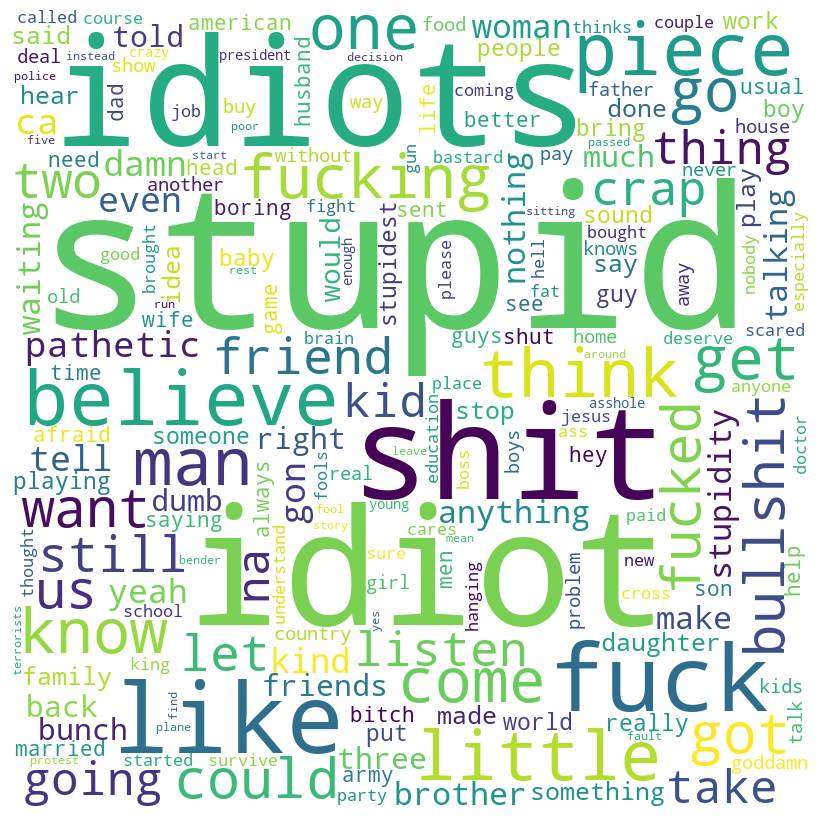

In [29]:
toxic_word_cloud = wordcloud.WordCloud(width=800, height=800, background_color='white', colormap='viridis', min_font_size=10)
toxic_word_cloud.generate_from_frequencies(toxic_freq)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(toxic_word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Exploration of the most common words from sentence with lowest toxicity

Here we tried the same techniques. Bar plots of frequencies for single words and ngrams.

But obtained results are too сommon. The main observation here is that there are not any common words and phrases that may seem toxic

100%|██████████| 1000/1000 [00:01<00:00, 730.36it/s]


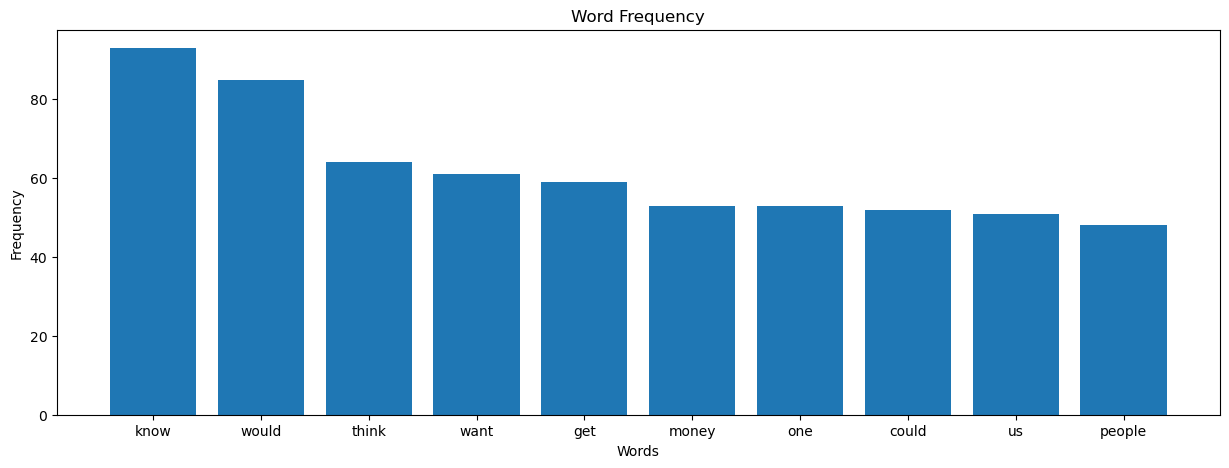

In [41]:
neutral_top_freq = corpus_freq(top_neutral)
make_frequency_plot(neutral_top_freq,n_most_common=10)

100%|██████████| 1000/1000 [00:01<00:00, 645.42it/s]


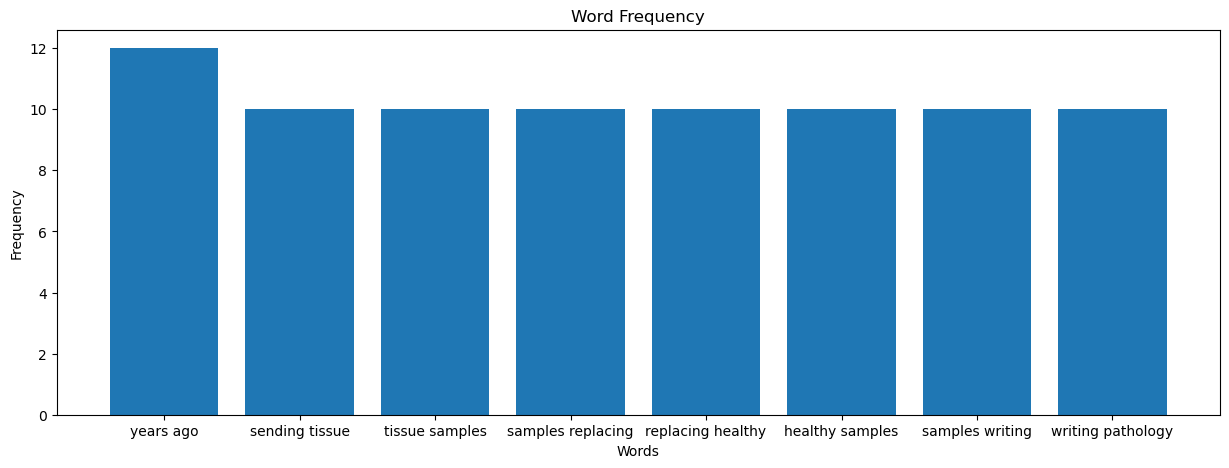

In [44]:
neutral_top_bigram_freq = ngram_freq(top_neutral, 2)
make_frequency_plot(neutral_top_bigram_freq, n_most_common=8, is_ngram=True)

100%|██████████| 1000/1000 [00:01<00:00, 605.48it/s]


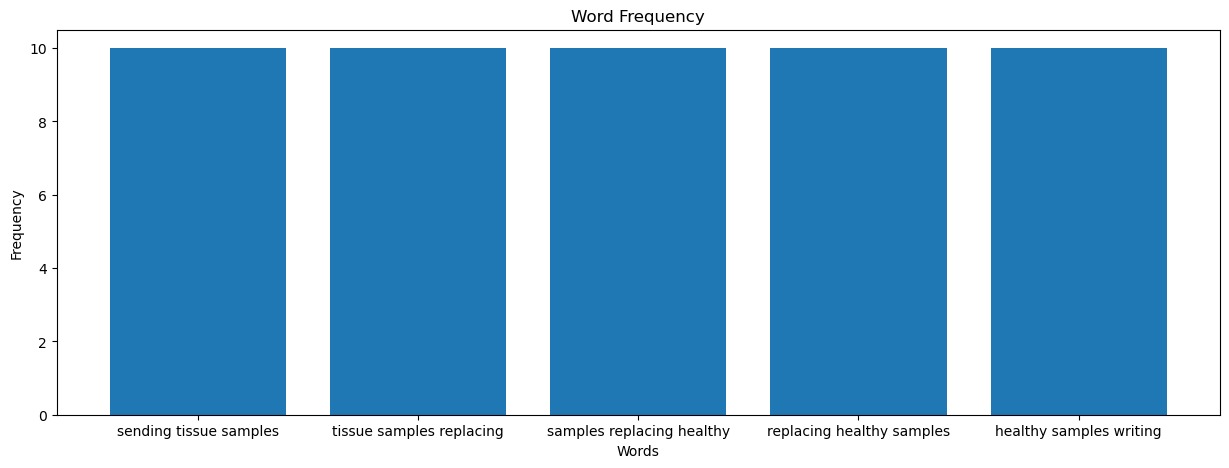

In [45]:
neutral_top_trigram_freq = ngram_freq(top_neutral, 3)
make_frequency_plot(neutral_top_trigram_freq, n_most_common=5, is_ngram=True)